In [1]:
import pandas as pd
import numpy as np


In [2]:
# Modify the base path:
path = "/Users/danielrodriguez/Desktop/"

In [3]:
data_tgv = pd.read_csv(path + "projet-ML-CS/data/tgv_data.csv",sep=";")

In [4]:
data_tgv.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [5]:
data_tgv.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [4]:
# Turn the dataframe into a new dataframe that has only two columns:
# 1. The name of the trip (i.e. the departure and arrival stations)
# 2. The retard_moyen_arrivee vector (grouping by date)

vector_data = data_tgv[["date","gare_depart","gare_arrivee","retard_moyen_arrivee"]].copy()
vector_data["trajet"]=vector_data["gare_depart"]+" - "+vector_data["gare_arrivee"]


In [ ]:
# Turn the dataframe into a new dataframe that has only two columns:
# 1. The name of the trip (i.e. the departure and arrival stations)
# 2. The retard_moyen_arrivee vector (grouping by date)

vector_data = data_tgv[["date","gare_depart","gare_arrivee","retard_moyen_arrivee"]].copy()
vector_data["trajet"]=vector_data["gare_depart"]+" - "+vector_data["gare_arrivee"]


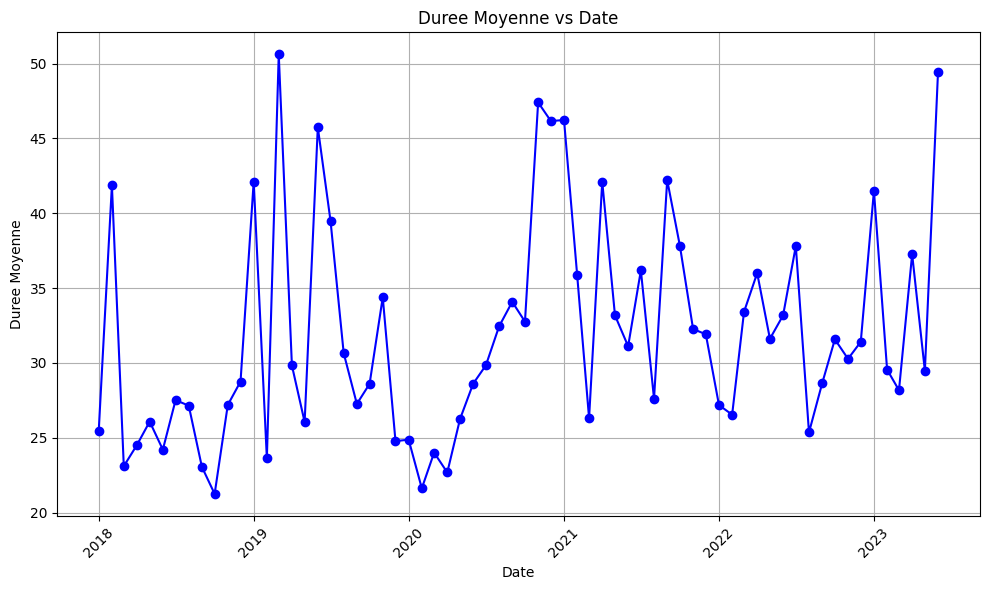

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'date' and 'duree_moyenne' columns
# For example:
# df = pd.DataFrame({'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
#                    'duree_moyenne': [5, 7, 3]})

# Convert 'date' column to datetime if it's not already in datetime format
paris_bordeaux_df['date'] = pd.to_datetime(paris_bordeaux_df['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(paris_bordeaux_df['date'], paris_bordeaux_df['retard_moyen_arrivee'], marker='o', color='b', linestyle='-')
plt.title('Duree Moyenne vs Date')
plt.xlabel('Date')
plt.ylabel('Duree Moyenne')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [10]:
useful_dimensions = ['date','retard_moyen_arrivee']

In [11]:
df = paris_bordeaux_df[useful_dimensions].copy()

In [12]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

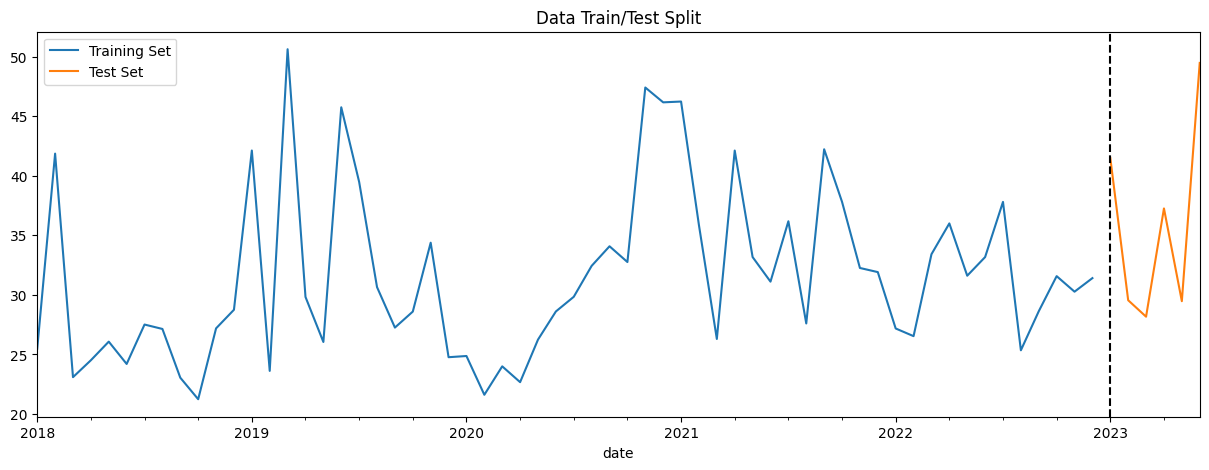

In [13]:
train = df.loc[df.index < '01-01-2023']
test = df.loc[df.index >= '01-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [14]:
def sliding_window(elements, window_size):
    matrix = []
    if len(elements) <= window_size:
       return elements
    for i in range(len(elements)- window_size + 1):
        matrix+=[elements[i:i+window_size]]
    
    return matrix

In [15]:
data_sw = pd.DataFrame(sliding_window(df.retard_moyen_arrivee.tolist(),5),columns=["D-4","D-3","D-2","D-1","D"])

In [16]:
data_sw["date"]=df.index[4:]

In [17]:
data_sw.head()

,D-4,D-3,D-2,D-1,D,date
0,25.479114,41.854352,23.095833,24.514620,26.076364,2018-05-01
1,41.854352,23.095833,24.514620,26.076364,24.203111,2018-06-01
2,23.095833,24.514620,26.076364,24.203111,27.511538,2018-07-01
3,24.514620,26.076364,24.203111,27.511538,27.141129,2018-08-01
4,26.076364,24.203111,27.511538,27.141129,23.050962,2018-09-01


In [18]:
train_df = data_sw[data_sw["date"]< "2023-01-01"].copy()
test_df = data_sw[data_sw["date"]>= "2023-01-01"].copy()

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_df[["D-4","D-3","D-2","D-1"]], train_df["D"])




LinearRegression()

In [20]:

lr_y_test_pred = lr_model.predict(test_df[["D-4","D-3","D-2","D-1"]])
lr_y_train_pred = lr_model.predict(train_df[["D-4","D-3","D-2","D-1"]])

df_to_plot = pd.DataFrame({"date":data_sw["date"].tolist(),"retard":data_sw["D"].tolist(),"retard_predit":lr_y_train_pred.tolist()+lr_y_test_pred.tolist()})


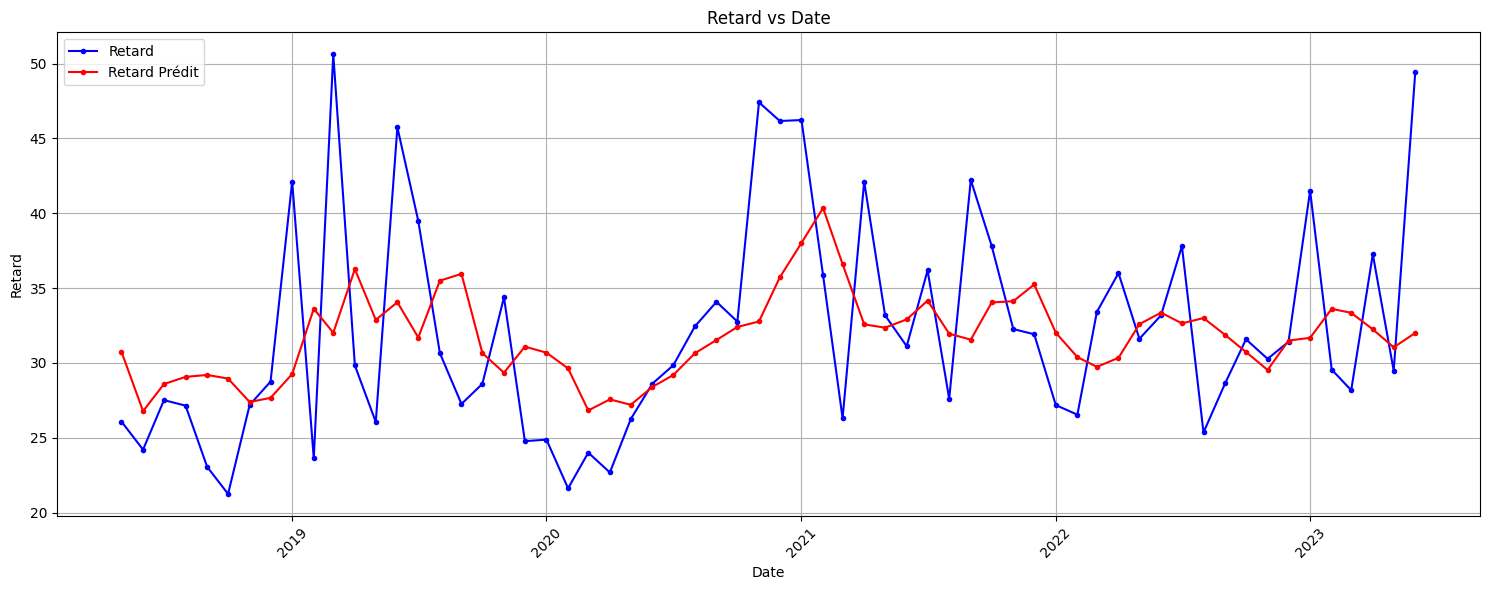

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(df_to_plot['date'], df_to_plot['retard'], marker='.', color='b', linestyle='-', label='Retard')
plt.plot(df_to_plot['date'], df_to_plot['retard_predit'], marker='.', color='r', linestyle='-', label='Retard Prédit')
plt.title('Retard vs Date')
plt.xlabel('Date')
plt.ylabel('Retard')
plt.legend()  # Show legend to distinguish between 'retard' and 'retard_predit'
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Approches possibles
- Sliding window avec normalisation ou non de la data et faire des regressions
- Clustering des comportements de chaque trajet pour essayer de comprendre des patterns commun au sein de certains trajets. 